# Mall Customer Segmentation Analysis

# Customer Segmentation Analysis with K-Means Clustering

In this analysis, we will explore and segment customers from a dataset using K-Means clustering. We'll load the data, visualize the distribution of features, perform clustering, and visualize the clusters in a 3D scatter plot.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Load and Preprocess the Data

In [3]:
# Load the data
df = pd.read_csv('Mall_Customers.csv')
df.drop(['CustomerID'], axis=1, inplace=True)

# Data Exploration and Visualization

## Descriptive Statistics

In [4]:
# Descriptive statistics
print(df.describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


## Missing Values Check

In [5]:
# Check for missing values
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Distribution Plots

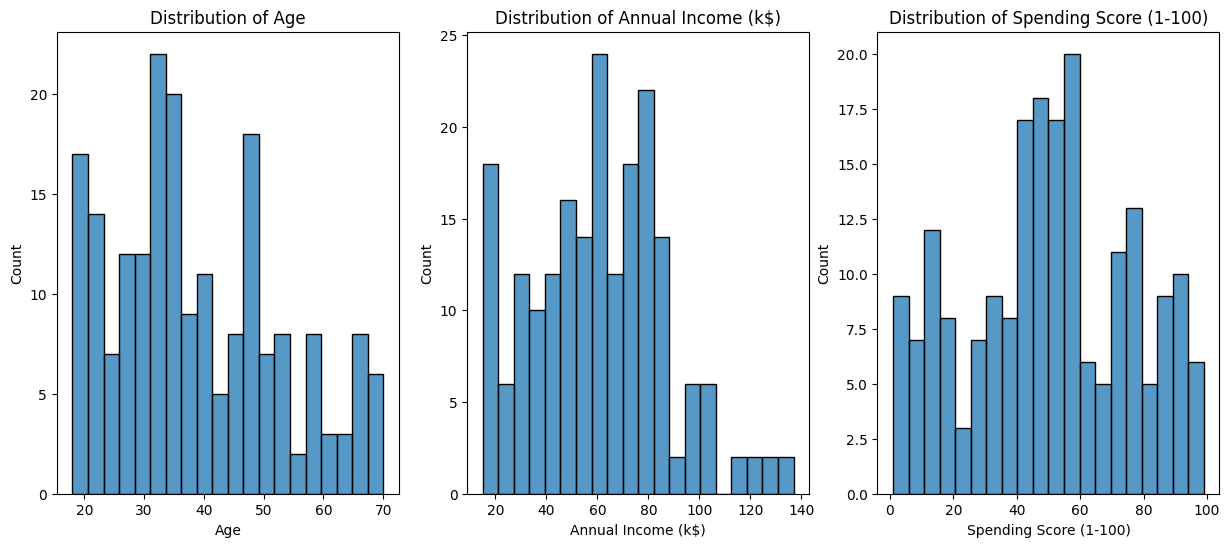

In [6]:
# Distribution plots
plt.figure(1, figsize=(15, 6))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=20)
    plt.title(f'Distribution of {col}')
plt.show()

## Gender Distribution

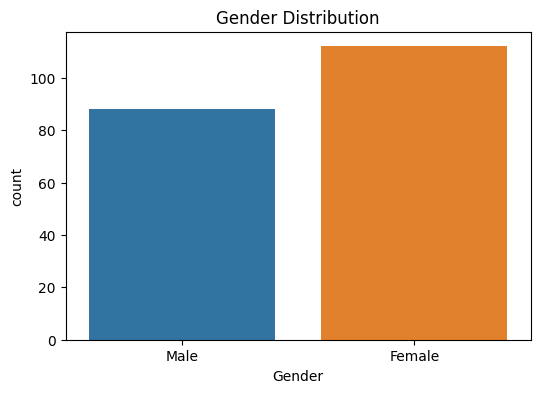

In [7]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

## Violin Plots

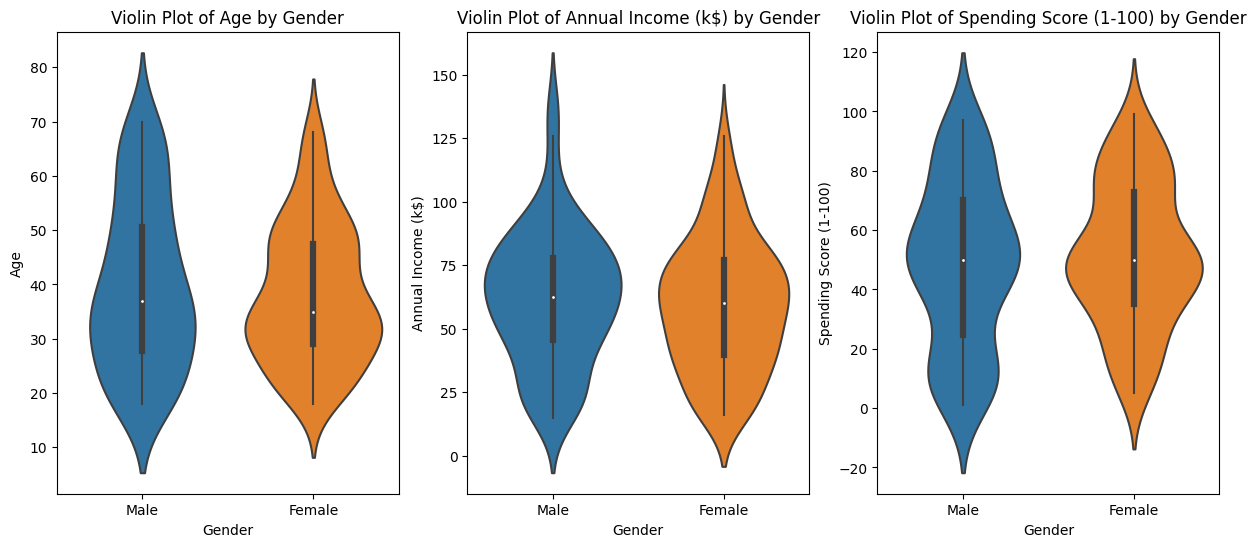

In [8]:
# Violin plots
plt.figure(figsize=(15, 6))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], start=1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='Gender', y=col, data=df)
    plt.title(f'Violin Plot of {col} by Gender')
plt.show()

# K-Means Clustering

## Feature Selection

In [9]:
# Feature selection
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

## Determine Optimal Number of Clusters (K)

c:\Users\SsDsS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SsDsS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SsDsS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SsDsS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

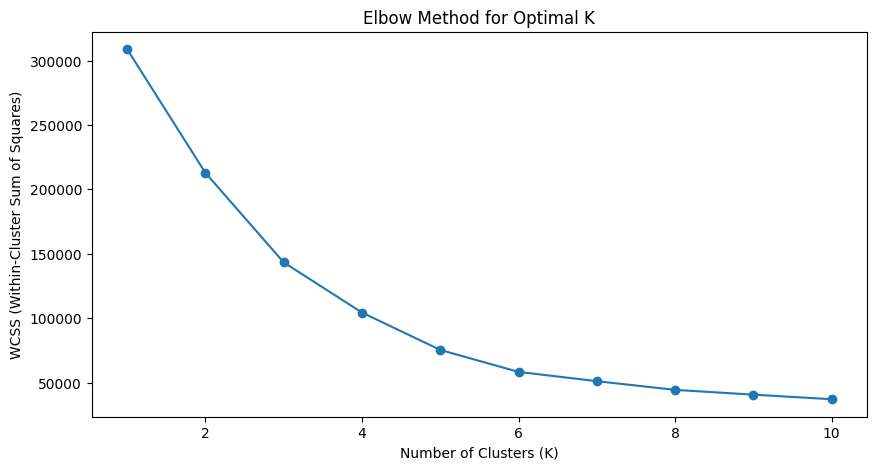

In [10]:
# Determine the optimal number of clusters (K) using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

## K-Means Clustering with K=5

In [11]:
# K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, init="k-means++")
df['Cluster'] = kmeans.fit_predict(X)

c:\Users\SsDsS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 3D Scatter Plot

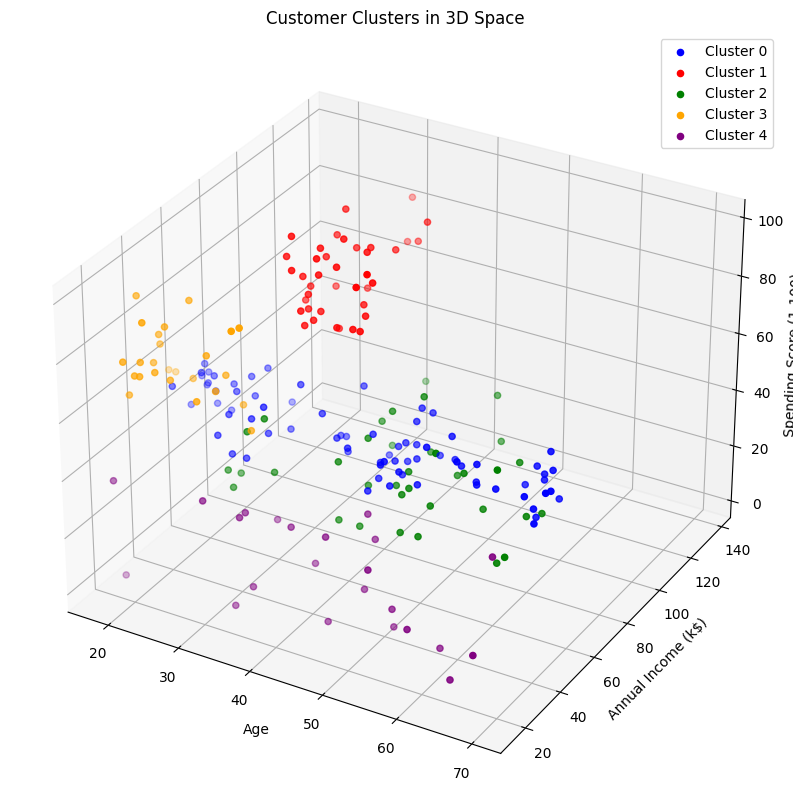

In [20]:
# 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'red', 'green', 'orange', 'purple']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i in range(5):
    cluster = df[df['Cluster'] == i]
    ax.scatter(cluster['Age'], cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
               c=colors[i], label=labels[i])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Clusters in 3D Space')
plt.legend()
plt.show()

c:\Users\SsDsS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


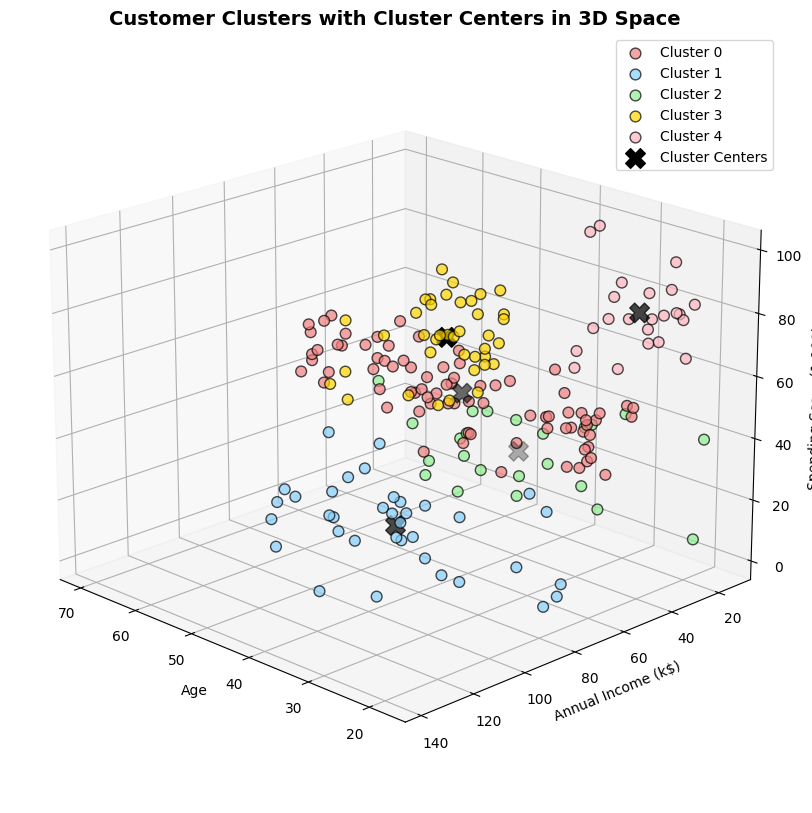

In [17]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, init="k-means++")
df['Cluster'] = kmeans.fit_predict(X)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create an Optimized 3D Scatter Plot with Cluster Centers
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink']

